In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the pickle file
final_df = pd.read_pickle("/Users/lb962/Downloads/ESL/GESLA/data/ml_ready/Northseahourly.pkl")

In [5]:
# You can use these selected rows as your node features
node_features = final_df[['q_sea_level', 'u10', 'v10',
       'mdts', 'mpts', 'mwd', 'mwp', 'sst', 'shts', 'shww', 'sp',
       'tide', 'HAT', 'LAT', 'MHHW', 'MLLW', 'MSL', 'TR']]
node_features 

,q_sea_level,u10,v10,mdts,mpts,mwd,mwp,sst,shts,shww,sp,tide,HAT,LAT,MHHW,MLLW,MSL,TR
0,1.021,-5.528502,1.651398,53.671074,4.563051,55.533493,4.414404,286.198456,0.517012,0.122229,100250.445312,0.111167,0.217,-0.249,0.152,-0.158,0.023,0.310
1,1.021,-5.528502,1.651398,53.671074,4.563051,55.533493,4.414404,286.198456,0.517012,0.122229,100250.445312,0.112000,0.213,-0.247,0.149,-0.156,0.023,0.305
2,1.021,-5.528502,1.651398,53.671074,4.563051,55.533493,4.414404,286.198456,0.517012,0.122229,100250.445312,0.112000,0.213,-0.247,0.149,-0.156,0.023,0.305
3,1.021,-5.528502,1.651398,53.671074,4.563051,55.533493,4.414404,286.198456,0.517012,0.122229,100250.445312,-1.825833,2.513,-2.702,1.580,-1.652,0.002,3.232
4,1.021,-5.528502,1.651398,53.671074,4.563051,55.533493,4.414404,286.198456,0.517012,0.122229,100250.445312,0.111167,0.217,-0.249,0.152,-0.158,0.023,0.310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,1.728,6.951291,5.808928,218.007843,4.159399,201.868500,3.399970,284.741547,0.308224,0.540245,98686.171875,-1.437833,2.513,-2.702,1.580,-1.652,0.002,3.232
1259,2.230,7.459048,-0.864768,198.198441,4.613428,191.463882,3.880234,284.491882,0.332257,0.797131,99268.757812,-0.827500,2.513,-2.702,1.580,-1.652,0.002,3.232
1260,2.702,2.825968,0.795872,259.016479,3.900858,259.011566,3.900816,284.438812,0.417574,0.000000,100505.218750,-0.095167,2.513,-2.702,1.580,-1.652,0.002,3.232
1261,3.476,-7.016085,1.661035,50.276123,6.406735,69.618744,5.570222,284.062225,0.357792,0.272769,100138.265625,0.623833,2.513,-2.702,1.580,-1.652,0.002,3.232


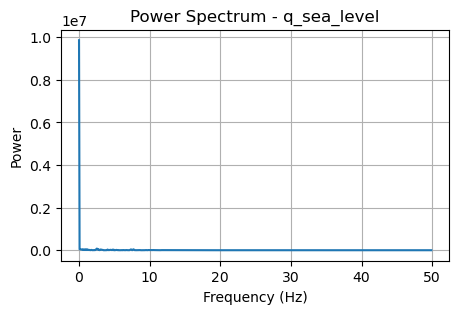

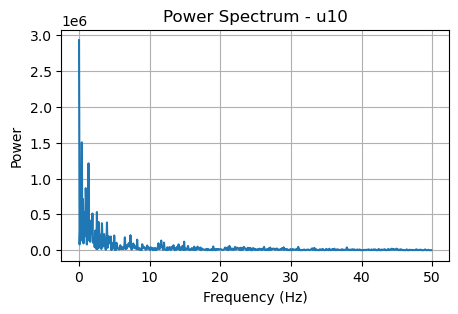

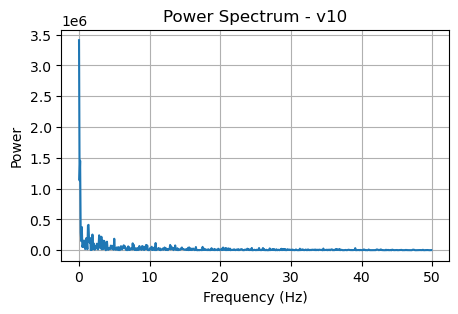

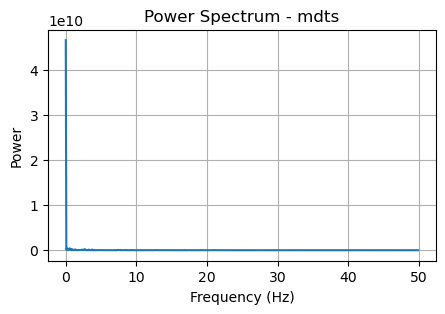

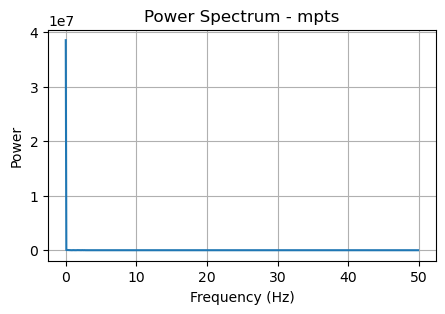

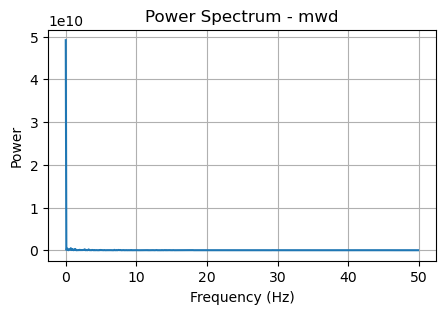

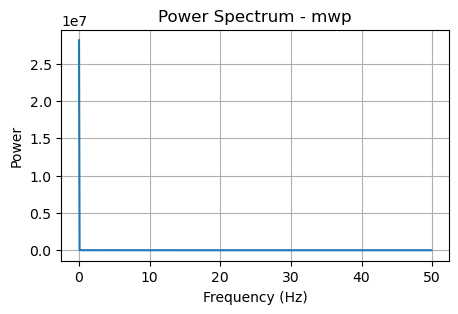

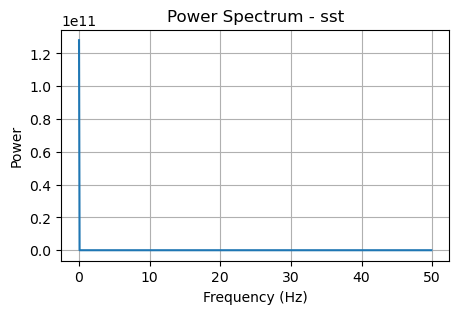

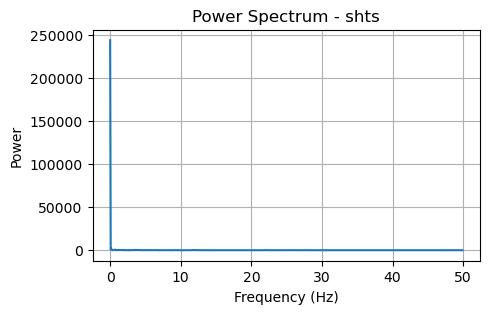

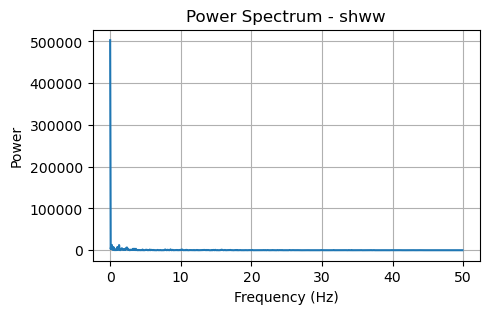

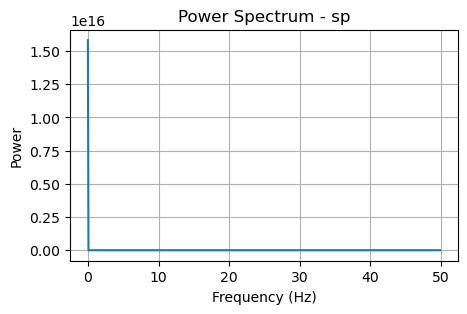

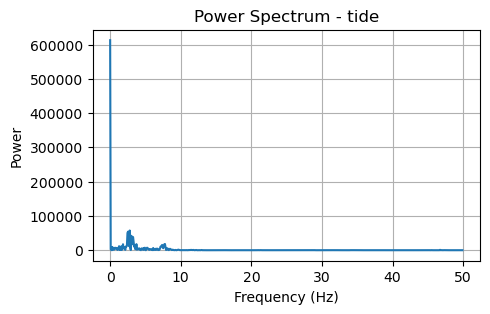

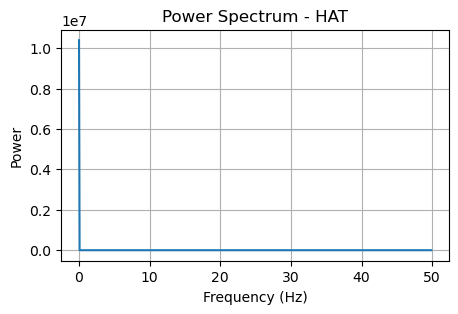

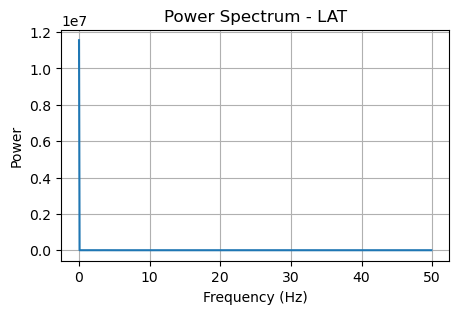

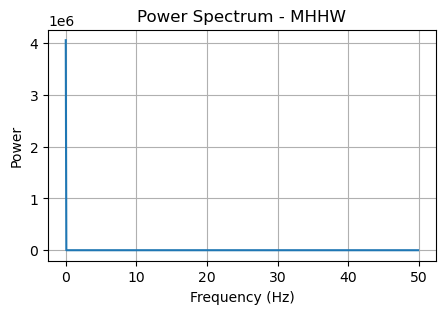

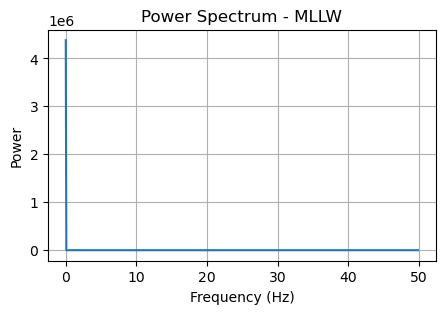

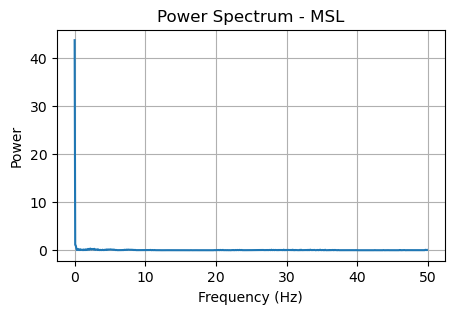

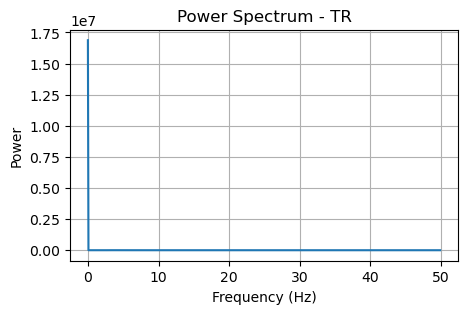

In [9]:
# Sampling frequency (Assuming your data is evenly sampled)
Fs = 100  # Example sampling frequency

# Iterate through each column and perform Fourier analysis
for col in node_features.columns:
    # Compute the Fourier transform
    fft_result = np.fft.fft(node_features [col])
    
    # Compute the power spectrum
    power_spectrum = np.abs(fft_result) ** 2
    
    # Frequencies corresponding to the power spectrum
    freqs = np.fft.fftfreq(len(node_features[col]), 1/Fs)
    
    # Plot the power spectrum for each column
    plt.figure(figsize=(5, 3))
    plt.plot(freqs[:len(freqs)//2], power_spectrum[:len(power_spectrum)//2])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.title('Power Spectrum - ' + col)
    plt.grid(True)
    plt.show()